## Miniproyecto: Criptoaritmética
### _Estudiantes_: Diana Valentina Caro & Paula Lorena López

Se llaman los archivos correspondientes para trabajar con el ambiente de _CriptoAritmetica_. El archivo de _busqueda.py_ contiene los algortimos de búsqueda con los que trabajaremos para hallar el mejor tiempo posible que logre resolver el problema.

In [1]:
from AmbientesMP import CriptoAritmetica
from busqueda import *

Para empezar, se escogen caracteres cortos con el fin de probar los algoritmos y el funcionamiento respectivo del ambiente. De esta manera, se escogen las siguientes palabras y su respectivo resultado (en palabras).

In [2]:
prob = CriptoAritmetica(["A","B","CD"])   

Se inicializa el problema y se visualiza para entender correctamente. Note que este problema es sencillo. Se obtiene que la suma de dos dígitos debe dar como resultado un número de dos dígitos. 

<AxesSubplot:>

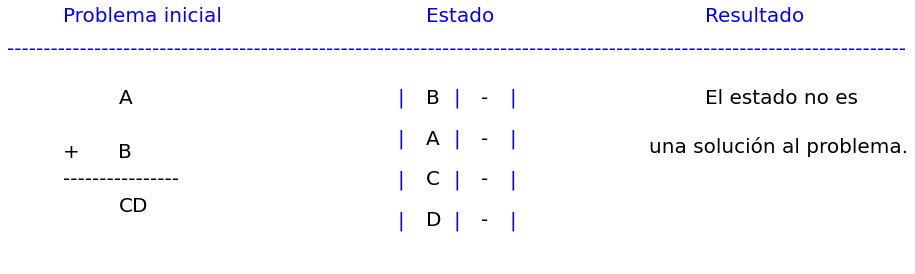

In [3]:
s = prob.estado_inicial
prob.pintar_estado(s)

Una vez establecido lo anterior, podemos evidenciar los posibles dígitos que pueden tomar cada letra. El algoritmo debe encontrar cuales de estas combinaciones cumplen con las reglas establecidas.

Observe que el valor de cada letra es independiente del valor de las otras justo antes de iniciar la búsqueda del valor. Una vez inicia el algoritmo y se encuentra el valor de una de ellas, el valor de las otras letras empieza a depender de este primero. 

In [4]:
len(prob.acciones_aplicables(s))

37

Por esta razón, existen 37 posibles acciones. Es decir, el algoritmo de búsqueda debe evaluar las combinaciones en las que se resuelva el problema.

In [5]:
print(prob.acciones_aplicables(s))

[('B', 1), ('B', 2), ('B', 3), ('B', 4), ('B', 5), ('B', 6), ('B', 7), ('B', 8), ('B', 9), ('A', 1), ('A', 2), ('A', 3), ('A', 4), ('A', 5), ('A', 6), ('A', 7), ('A', 8), ('A', 9), ('C', 1), ('C', 2), ('C', 3), ('C', 4), ('C', 5), ('C', 6), ('C', 7), ('C', 8), ('C', 9), ('D', 0), ('D', 1), ('D', 2), ('D', 3), ('D', 4), ('D', 5), ('D', 6), ('D', 7), ('D', 8), ('D', 9)]


El primer algoritmo con el que se prueba es _breadth first search_. Este se expande desde la raíz, evalúa cada elemento por nivel y así, considera las opciones factibles. Sin embargo, este considera la menor distancia para hallar la respuesta.

In [72]:
%%time 
opc = breadth_first_search(prob)
if opc is not None:
    res = solucion(opc)
    print('El resultado encontrado fue el siguiente: ', res)
else:
    print("No hay solución.")

El resultado encontrado fue el siguiente:  [('C', 1), ('D', 0), ('B', 2), ('A', 8)]
CPU times: user 275 ms, sys: 998 µs, total: 276 ms
Wall time: 277 ms


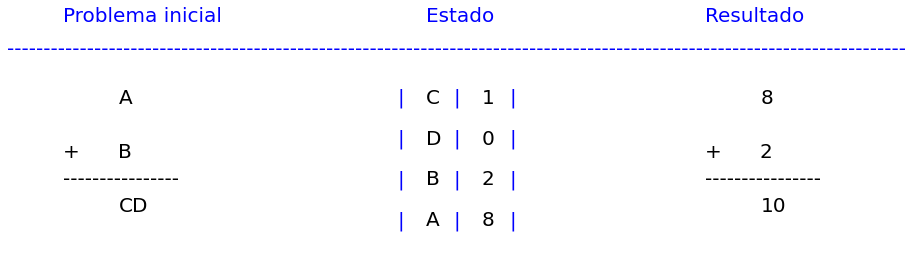

In [73]:
prob.pintar_camino(res)

El segundo algoritmo con el que se intentó fue _Depth first search_. Este algoritmo tiene un enfoque diferente. Por esta razón, la respuesta no es la misma dado que no se tienen condiciones iniciales y por lo tanto no es única. Sin embargo, también es correcta. 

Este algoritmo se enfoca en la búsqueda desde el nodo predecesor hacia el nodo sucesor y luego a su sucesor. Una vez recorre toda la primera rama, regresa al nodo predecesor y sigue con la siguiente rama.

In [74]:
%%time 
opc2 = depth_first_search(prob)
if opc2 is not None:
    res2 = solucion(opc2)
    print('El resultado encontrado fue el siguiente: ', res2)
else:
    print("No hay solución.")

El resultado encontrado fue el siguiente:  [('A', 9), ('B', 8), ('D', 7), ('C', 1)]
CPU times: user 1.74 ms, sys: 0 ns, total: 1.74 ms
Wall time: 1.69 ms


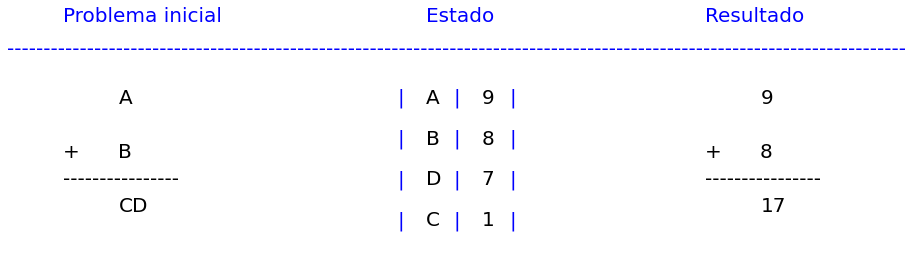

In [75]:
prob.pintar_camino(res2)

El tercer algoritmo con el que se prueba es _Best first search_. También llamado Dijkstra, es similar al _Depth_. Se revisa el primer nodo y se expande por la frontera. Para este algoritmo, se utilizará la función de _costo uniforme_. Esta función correspondería a la heurística dado que se tiene en cuenta una condición para hallar el resultado.

La función de costo uniforme le dará un valor de $1$ por cada acción que tome. De esta manera, encontrará el camino más corto en donde se satisfaga las condiciones.


In [6]:
def costo_uniforme(self, estado, accion):
    return 1

In [10]:
%%time 
opc3 = best_first_search(prob, costo_uniforme)
if opc3 is not None:
    res3 = solucion(opc3)
    print('El resultado encontrado fue el siguiente: ', res3)
else:
    print("No hay solución.")

El resultado encontrado fue el siguiente:  [('C', 1), ('B', 9), ('D', 2), ('A', 3)]
Wall time: 310 ms


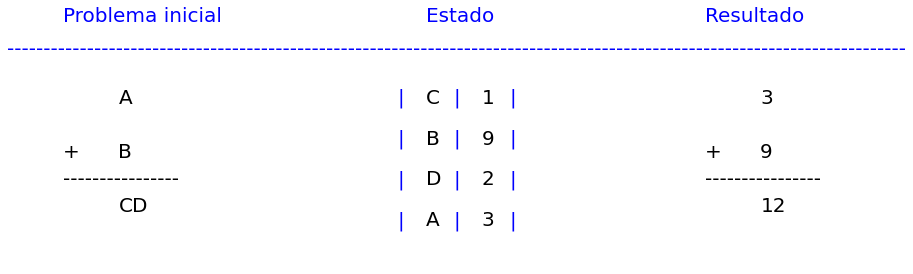

In [11]:
prob.pintar_camino(res3)

Aunque el ejemplo es básico, note que en términos de tiempo hay unos algortimos que son mejores que otros. 


|  Algoritmo| Tiempo| |
| :---: | :---: | :---: |
| Breadth first search | 277 ms |
| Depth first search | 1.69 ms |
| Best first search | 278 ms |


Sin embargo, es un ejemplo muy básico y la solución es fácil de encontrar. Por esta razón se decide incrementar la complejidad eligiendo un texto más largo. Se siguen teniendo las mismas reglas del problema.

<AxesSubplot:>

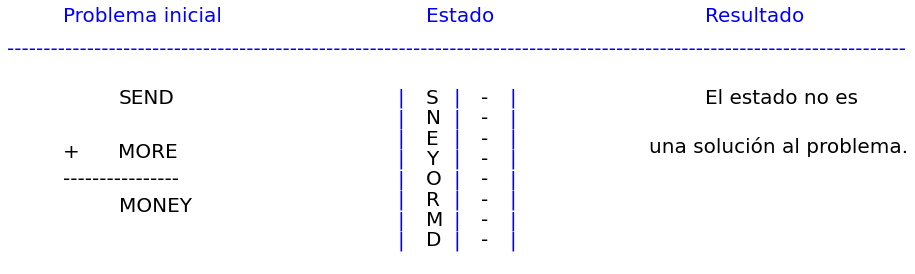

In [14]:
prob2 = CriptoAritmetica(['SEND', 'MORE', 'MONEY'])
s2 = prob2.estado_inicial
prob2.pintar_estado(s2)

In [15]:
print(prob2.acciones_aplicables(s2))

[('S', 1), ('S', 2), ('S', 3), ('S', 4), ('S', 5), ('S', 6), ('S', 7), ('S', 8), ('S', 9), ('N', 0), ('N', 1), ('N', 2), ('N', 3), ('N', 4), ('N', 5), ('N', 6), ('N', 7), ('N', 8), ('N', 9), ('E', 0), ('E', 1), ('E', 2), ('E', 3), ('E', 4), ('E', 5), ('E', 6), ('E', 7), ('E', 8), ('E', 9), ('Y', 0), ('Y', 1), ('Y', 2), ('Y', 3), ('Y', 4), ('Y', 5), ('Y', 6), ('Y', 7), ('Y', 8), ('Y', 9), ('O', 0), ('O', 1), ('O', 2), ('O', 3), ('O', 4), ('O', 5), ('O', 6), ('O', 7), ('O', 8), ('O', 9), ('R', 0), ('R', 1), ('R', 2), ('R', 3), ('R', 4), ('R', 5), ('R', 6), ('R', 7), ('R', 8), ('R', 9), ('M', 1), ('M', 2), ('M', 3), ('M', 4), ('M', 5), ('M', 6), ('M', 7), ('M', 8), ('M', 9), ('D', 0), ('D', 1), ('D', 2), ('D', 3), ('D', 4), ('D', 5), ('D', 6), ('D', 7), ('D', 8), ('D', 9)]


Note que en este ejemplos, las posibles combinaciones incrementan considerablemente. Esto nos puede dar una pista del tiempo que puede tardar el algoritmo en encontrar una solución.


In [16]:
len(prob2.acciones_aplicables(s2))

78

In [20]:
%%time 
opc = best_first_search(prob2, costo_uniforme)
if opc is not None:
    res = solucion(opc)
    print('El resultado encontrado fue el siguiente: ', res)
else:
    print("No hay solución.")

El resultado encontrado fue el siguiente:  [('E', 5), ('D', 7), ('R', 8), ('Y', 2), ('O', 0), ('N', 6), ('S', 9), ('M', 1)]
CPU times: user 22min 6s, sys: 6.44 s, total: 22min 13s
Wall time: 22min 14s


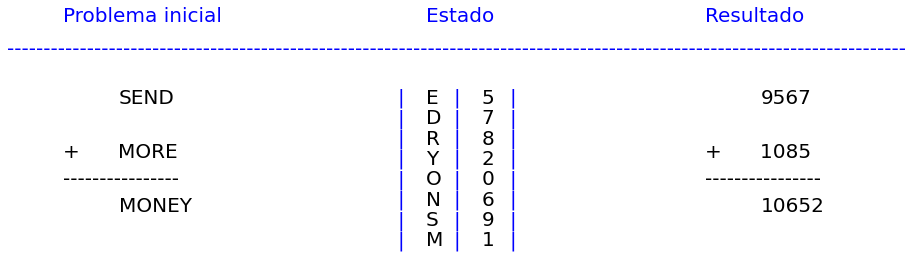

In [21]:
prob2.pintar_camino(res)

Computacionalmente, el algoritmo de Dijkstra es uno de los mejores. Por esta razón se decidió probarlo. Dado que no se tiene niguna regla inicial, el algoritmo tardó bastante tiempo. 
Sin embargo, se puede evidenciar que el resultado es correcto y satisface las condiciones principales del problema.

No obstante, se puede mejorar este tiempo teniendo en cuenta ciertas condiciones iniciales. Dado que ya tenemos el resultado de lol anterior algortimo, se puede implementar y el tiempo podría disminuir. Se observará el comportamiento de diferentes algoritmos con diferentes condiciones iniciales.

In [17]:
prob2 = CriptoAritmetica(['SEND', 'MORE', 'MONEY'])
s2 = prob2.estado_inicial
s2['E']= 5
s2['N']= 6

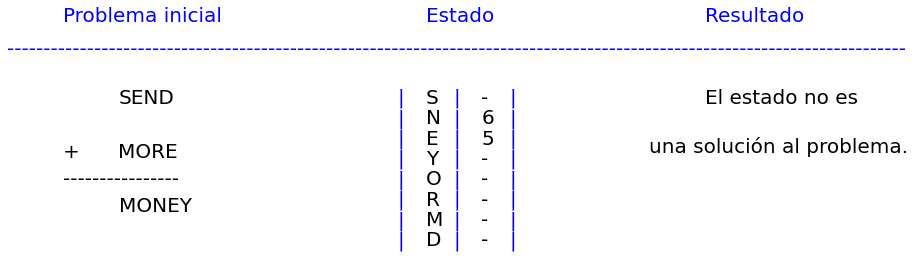

In [18]:
prob2.pintar_camino(s2)

Una vez realizada la incialización, en _s2_ queda guardado y a partir de ahí se encuentra la solución.

In [84]:
%%time
opc3 = best_first_search(prob2, costo_uniforme)
if opc3 is not None:
    res3 = solucion(opc3)
    print('El resultado encontrado fue el siguiente: ', res3)
else:
    print('No hay solución.')

El resultado encontrado fue el siguiente:  [('R', 8), ('D', 7), ('O', 0), ('Y', 2), ('S', 9), ('M', 1)]
CPU times: user 7.14 s, sys: 23 ms, total: 7.17 s
Wall time: 7.17 s


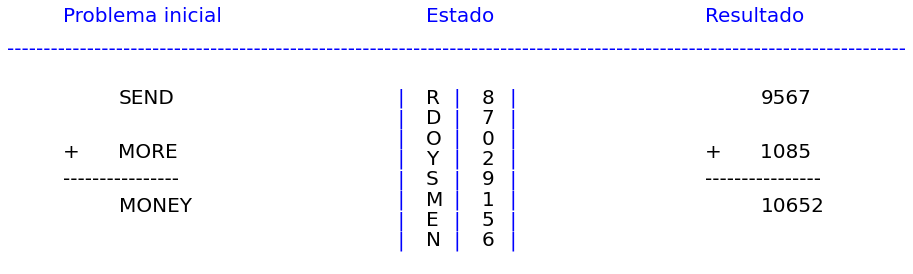

In [85]:
res3 += [('E', 5), ('N', 6)]
prob2.pintar_camino(res3)

Note la diferencia de tiempo ejecutando el mismo algoritmo. Su diferencia son las condiciones iniciales. Y el orden en el cual se encuentran las correspondencias. Este orden está ligado a  la búsqueda que hace y cada nodo que va encontrando. Es decir, si camino.

Sin embargo, se probarán los demás algoritmos.

Dado que uno de los mejores tiempos obtenidos en el anterior ejemplo fue _depth first search_, se decide probar en este ejemplo para ver la variación de tiempo y de respuesta.

Ingresamos un condición inicial más para apoyar al algoritmo en su búsqueda.

In [19]:
prob2 = CriptoAritmetica(['SEND', 'MORE', 'MONEY'])
s2 = prob2.estado_inicial
s2['E']= 5
s2['N']= 6
s2['M']= 1

In [87]:
%%time
opc5 = depth_first_search(prob2)
if opc5 is not None:
    res5 = solucion(opc5)
    print('El resultado encontrado fue el siguiente: ', res5)
else:
    print('No hay solución.')

El resultado encontrado fue el siguiente:  [('S', 9), ('O', 0), ('R', 8), ('Y', 2), ('D', 7)]
CPU times: user 57.7 ms, sys: 0 ns, total: 57.7 ms
Wall time: 59.7 ms


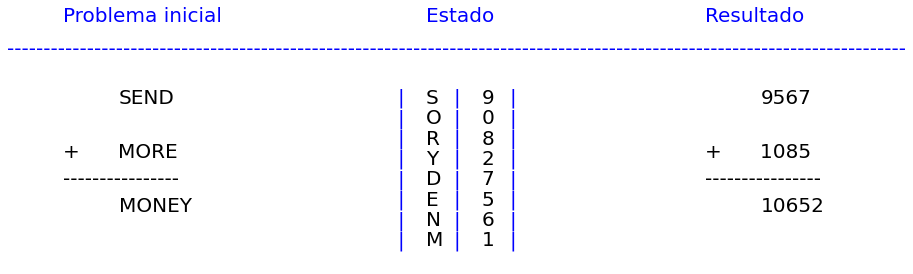

In [88]:
res5 += [('E', 5), ('N', 6), ('M', 1)]
prob2.pintar_camino(res5)

Con las condiciones iniciales, los algoritmos son óptimos pues el tiempo de ejecución es realmente bueno para este tipo de palabras. Aunque la respuesta fue la misma, y las condiciones iniciales están ligadas a la respuesta, el orden en el cual fue encontrada es distinto. Esto se puede ver en esta última parte.

Con las mismas condiciones, se prueba el algoritmo óptimo del anterior ejemplo.

In [20]:
prob2 = CriptoAritmetica(['SEND', 'MORE', 'MONEY'])
s2 = prob2.estado_inicial
s2['E']= 5
s2['N']= 6
s2['M']= 1

In [90]:
%%time
opc4 = breadth_first_search(prob2)
if opc4 is not None:
    res4 = solucion(opc4)
    print('El resultado encontrado fue el siguiente: ', res4)
else:
    print('No hay solución.')

El resultado encontrado fue el siguiente:  [('D', 7), ('Y', 2), ('R', 8), ('O', 0), ('S', 9)]
CPU times: user 25 s, sys: 142 ms, total: 25.1 s
Wall time: 25.1 s


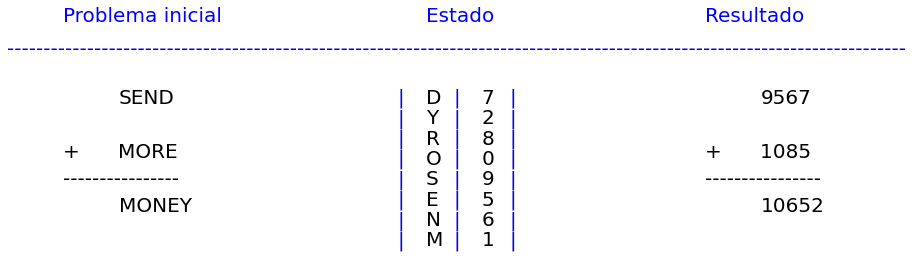

In [91]:
res4 += [('E', 5), ('N', 6), ('M', 1)]
prob2.pintar_camino(res4)


| Algoritmo |Tiempo | Condiciones | |
| :---: | :---: | :---: |:---: |
| Breadth first search | 25.1 s | Sí|
| Depth first search | 59.7 ms | Sí|
| Best first search | 7.17 s | Sí|
| Best first search | 22.14 min | No|

- Se ejecutaron diferentes algoritmos para encontrar cual es la mejor búsqueda. Sin embargo, los resultados dependen de la complejidad del problema. 

- De igual forma, los problemas de Criptoaritmética se pueden solucionar con los tres algoritmos de búsqueda utilizados.

- El mejor algoritmo es el _best first search_, dado que fue el único que ejecutó en un considerable tiempo. No fue muy óptimo, sin embargo, al no tener condiciones iniciales, lcompletó la solución del problema. Se intentó con los otros algoritmos pero el tiempo fue realmente lento.

- Por otro lado, si se tienen condiciones iniciales, los algoritmos serán mucho más rápidos. Teniendo en cuenta los resultados, los algortimos de _best first search_  y _depth first search_ fueron los más óptimos en estos casos.